# Part A: State-wise cigarette consumption

In [1]:
import pandas as pd 

In [2]:
cigarette = pd.read_csv('cigarette(2).csv') #reading the file and storing it under cigarette
cigarette.head() #viewing the first 5 rows of the data

,Unnamed: 0,state,year,price,pop,pop16,cpi,ndi,sales,pimin
0,1,1,63,28.6,3383.0,2236.5,30.6,1558.304530,93.9,26.1
1,2,1,64,29.8,3431.0,2276.7,31.0,1684.073203,95.4,27.5
2,3,1,65,29.8,3486.0,2327.5,31.5,1809.841875,98.5,28.9
3,4,1,66,31.5,3524.0,2369.7,32.4,1915.160357,96.4,29.5
4,5,1,67,31.6,3533.0,2393.7,33.4,2023.546368,95.5,29.6


In [3]:
states = cigarette.groupby('state')['price'].mean().reset_index() #grouping the data by state and outputing the price for that state; using .mean() to get the average of the price for each state
states.head()

,state,price
0,1,69.146667
1,3,67.453333
2,4,69.426667
3,5,71.486667
4,7,78.453333


In [4]:
top_5 = states.sort_values(by = ['price'], ascending = False).head(5) #getting the top 5 states with the highest average price
top_5

,state,price
4,7,78.453333
42,48,78.276667
7,10,75.916667
27,31,75.806667
20,24,75.303333


<AxesSubplot:title={'center':'price'}, xlabel='[state]'>

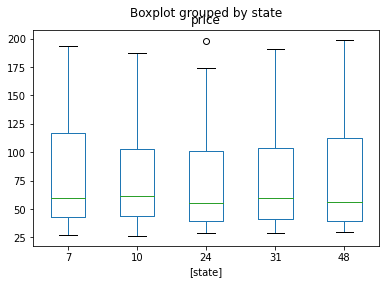

In [5]:
plotdata = cigarette['state'].isin(top_5['state']) #gathering the top 5 state date using .isin() by state
filtered = cigarette[plotdata] 
filtered.boxplot(by = ['state'], column = ['price'], grid = False) #creating the boxplot

# Part B: Worldometer coronavirus: Visualization using Python

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
covid = pd.read_csv('Pandemic(4).csv') #storing the data under 'covid'
covid.head()#reading the first 5 rows of the data

,ds,location,location_type,location_code,location_code_type,data_type,value,lat,long
0,25-06-2020,Afghanistan,country,AF,iso_3166_2,deaths_new,36,33.93911,67.709953
1,20-02-2020,Afghanistan,country,AF,iso_3166_2,cases_new,0,33.93911,67.709953
2,23-03-2020,Afghanistan,country,AF,iso_3166_2,deaths_new,0,33.93911,67.709953
3,18-02-2020,Afghanistan,country,AF,iso_3166_2,cases_new,0,33.93911,67.709953
4,19-02-2020,Afghanistan,country,AF,iso_3166_2,cases_new,0,33.93911,67.709953


In [12]:
covid['ds'] = pd.to_datetime(covid['ds'], format = "%d-%m-%Y") #transforming the dates to be in the form of date-month-year
Colombia = covid[covid.location == 'Colombia'] #getting covid data for the country of Colombia
Peru = covid[covid.location == 'Peru'] #getting covid data for the country of Peru

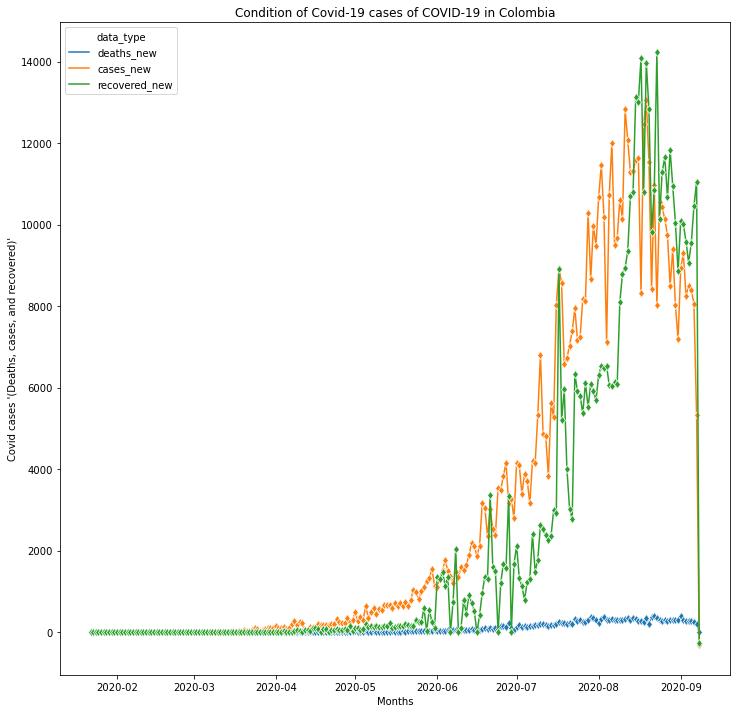

In [17]:
fig, ax1 = plt.subplots(figsize = (12,12))

colombiacovid = sns.lineplot(Colombia['ds'], Colombia['value'], data = Colombia, hue = 'data_type', marker = 'd')
#creating the lineplot for the Colombian covid data
colombiacovid.set_xlabel('Months')
colombiacovid.set_ylabel("Covid cases '(Deaths, cases, and recovered)'")
plt.title('Condition of Covid-19 cases of COVID-19 in Colombia')
plt.show()

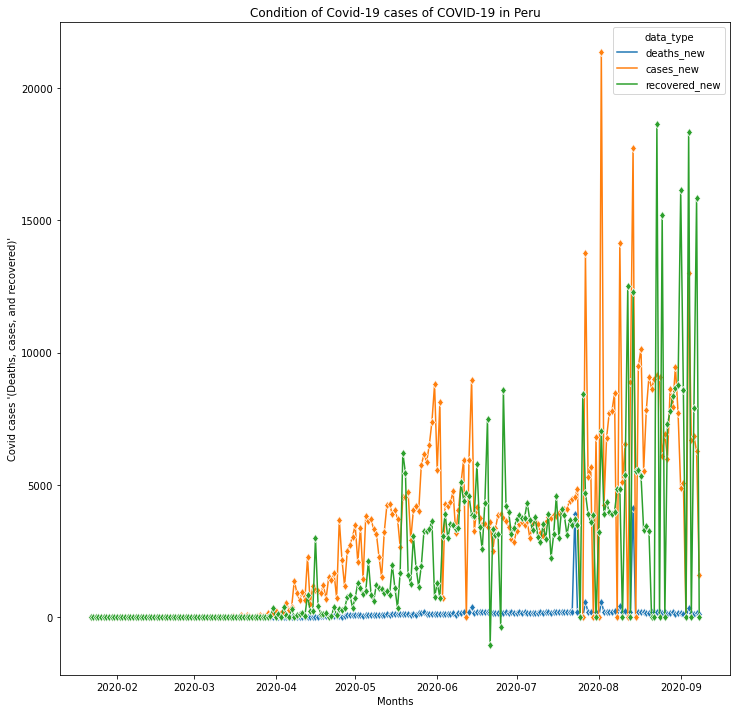

In [18]:
fig, ax1 = plt.subplots(figsize = (12,12))

perucovid = sns.lineplot(Peru['ds'], Peru['value'], data = Peru, hue = 'data_type', marker = 'd')
#creating the lineplot for the Peruvian covid data
perucovid.set_xlabel('Months')
perucovid.set_ylabel("Covid cases '(Deaths, cases, and recovered)'")
plt.title('Condition of Covid-19 cases of COVID-19 in Peru')
plt.show()

# Part C Nobel Prize study: Visualization using Python

# Task 1:

In [19]:
import pandas as pd 

In [20]:
nobel = pd.read_csv("Nobel Prize(1).csv") #storing the data under nobel
nobel.head() #reading the first 5 rows of the nobel data

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",01-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,01-03-1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",01-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,07-09-1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",01-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,31-03-1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,01-Feb,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,30-10-1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,01-Feb,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,12-06-1912,Paris,France


In [21]:
nobel1 = nobel.dropna(how = 'any') #dropping all the NA's in the data 
nobel1.isnull().sum()
nobel1.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",01-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,01-03-1911,Berlin,Germany
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",01-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,31-03-1917,Marburg,Germany
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",01-Jan,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,10-02-1923,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",01-Jan,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,15-07-1919,Berlin,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",01-Jan,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,16-09-1932,Putney Heath,United Kingdom


In [22]:
prizes = nobel1.groupby('Organization Country')['Prize'].count().reset_index() #grouping the data by organization and displaying the number of prizes for each by using .count()
prizes.head()

,Organization Country,Prize
0,"Alsace (then Germany, now France)",1
1,Argentina,2
2,Australia,2
3,Austria,6
4,Belgium,5


In [23]:
top_10 = prizes.sort_values(by = ['Prize'], ascending = False).head(10) #finding the top 10 organizations by sorting it by the number of prizes
top_10

,Organization Country,Prize
26,United States of America,182
25,United Kingdom,66
11,Germany,44
10,France,23
8,Federal Republic of Germany,16
22,Sweden,15
23,Switzerland,13
24,Union of Soviet Socialist Republics,10
7,Denmark,7
17,Netherlands,7


# Task 2:

In [24]:
gendernobel = nobel1[(nobel1['Sex'] != 'Male')] #getting the data for only females by using != Male
firstwoman = gendernobel.sort_values(by = ['Year'], ascending = True).head(1) #sorting the data by year and having the data ascend, using head(1) to get the first woman to recieve a nobel prize 
firstwoman 

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",01-Jan,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,04-07-1934,Sallanches,France


# Task 3:

In [25]:
#Female nobel prize winner amount
gender = nobel1[nobel1['Sex'] != 'Male'].groupby('Category')['Prize'].count().reset_index() #getting the data for only females and grouping it by category and showing the amount of females that have won that category prize by using .count()
gender #it is observed that not many females have won nobel prizes in each category compared to men

,Category,Prize
0,Chemistry,3
1,Economics,2
2,Medicine,5
3,Physics,1


In [26]:
#Male nobel prize winner amount
gender = nobel1[nobel1['Sex'] != 'Female'].groupby('Category')['Prize'].count().reset_index()#getting the data for only males and grouping it by category and showing the amount of females that have won that category prize by using .count()
gender #men have won signifcantly more prizes in each category compared to females

,Category,Prize
0,Chemistry,113
1,Economics,38
2,Medicine,143
3,Physics,120


# Task 4:

In [27]:
toporgs = nobel1.groupby('Organization Name')['Prize'].count().reset_index() #grouping the data by organization and displaying the number of prizes each has won using .count()
toporgs

,Organization Name,Prize
0,Aarhus University,1
1,Academy of Sciences,3
2,All Souls College,1
3,Amsterdam University,2
4,Arizona State University,1
...,...,...
204,Zoologisches Institut der Universität München,1
205,École Nationale Supérieur des Mines de Paris,1
206,École Normale Supérieure,1
207,École Supérieure de Physique et Chimie,1


In [28]:
top_25 = toporgs.sort_values(by = ['Prize'], ascending = False).head(25) #sorting the data by prize and displaying the top 25 using .head(25)
top_25

,Organization Name,Prize
160,University of California,21
51,Harvard University,15
161,University of Cambridge,14
162,University of Chicago,12
19,California Institute of Technology (Caltech),10
140,Stanford University,8
176,University of Oxford,8
11,Berlin University,7
127,Rockefeller University,7
28,Columbia University,7


# Task 5: 

In [29]:
import pandas as pd 
import seaborn as sn 
import matplotlib.pyplot as plt 

In [30]:
prizebyyear = nobel1.groupby('Year')['Prize'].count().reset_index() #grouping the data by year and displaying the number of prizes given in that year 
prizebyyear

,Year,Prize
0,1901,3
1,1902,3
2,1903,3
3,1904,2
4,1905,3
...,...,...
98,2007,2
99,2008,2
100,2009,3
101,2010,3


<AxesSubplot:xlabel='Year', ylabel='Prize'>

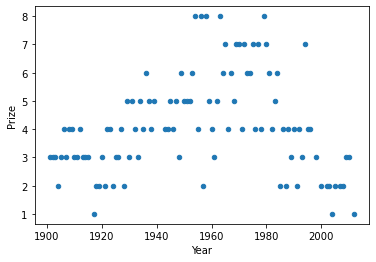

In [31]:
prizebyyear.plot.scatter(x = 'Year', y = 'Prize') #creating a scatterplot for the number of prizes given out based on the year

# Part D: IPL Indian Premier League 

# Task 1:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
ipl = pd.read_csv("IPL.csv") #storing the data under ipl
ipl

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


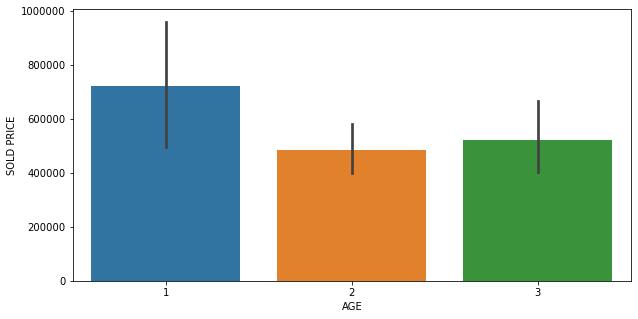

In [34]:
plt.figure(figsize = (10,5))
plt.ticklabel_format(style = 'plain')
plot = sns.barplot(x = 'AGE', y = 'SOLD PRICE', data = ipl) #creating a boxplot for age and sold price 
plt.show()

# Task 2: 

In [35]:
import seaborn as sns

Text(0.5, 1.0, 'Histogram for SOLD PRICE')

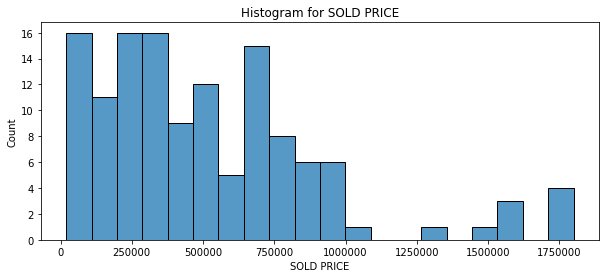

In [36]:
plt.figure(figsize = (10,4))
plt.ticklabel_format(style = 'plain')
sns.histplot(data=ipl, x = 'SOLD PRICE', bins=20) #creating a histogram for sold price
plt.title('Histogram for SOLD PRICE')

# Task 3:

Text(0.5, 1.0, 'Boxplot')

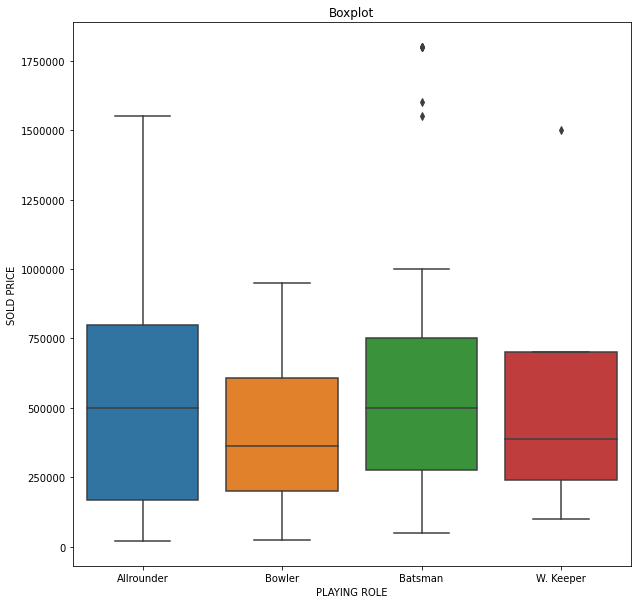

In [37]:
plt.figure(figsize = (10,10))
plt.ticklabel_format(style = 'plain')
sns.boxplot(x = 'PLAYING ROLE', y = 'SOLD PRICE', data = ipl) #creating a boxplot for playing role and sold price
plt.title('Boxplot')

# Task 4:

Text(0.5, 1.0, 'SCATTERPLOT')

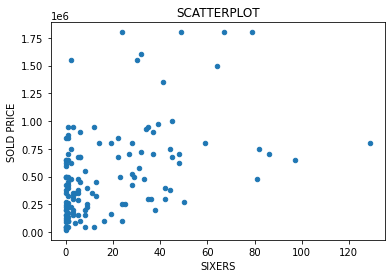

In [38]:
ipl.plot.scatter(x = 'SIXERS', y = 'SOLD PRICE') #creating a scatterplot for sold price versus sixers
plt.title('SCATTERPLOT')